# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

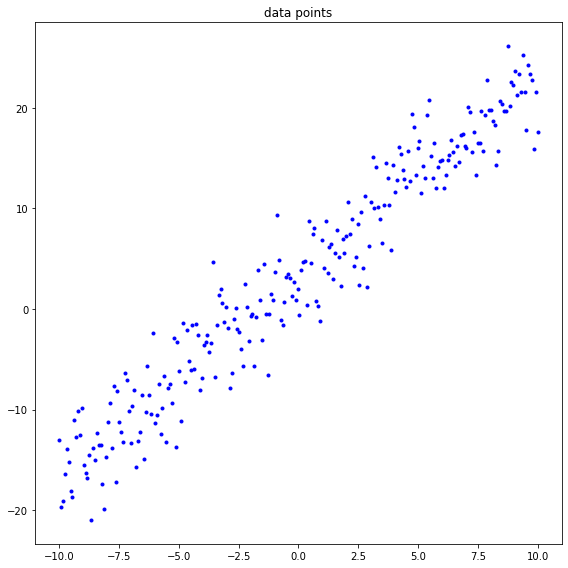

In [2]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

In [3]:
len(x)

256

In [4]:
x.shape

(256,)

In [110]:
len(x)==len(y)

True

## compute the loss function

In [111]:
def compute_loss(x, y, theta0, theta1):

    loss = (0.5 / len(x)) * np.sum(np.power((theta0 + theta1 * x - y), 2))
    
    return loss

## compute the gradient for each model parameter

In [112]:
def compute_gradient_theta0(x, y, theta0, theta1):
    
    dL = (1/len(x)) * np.sum(np.dot((theta0 + theta1 * x - y), 1))
    
    return dL

In [113]:
def compute_gradient_theta1(x, y, theta0, theta1):

    dL = (1/len(x)) * np.sum(np.dot((theta0 + theta1 * x - y), x))
    
    return dL 

## gradient descent for each model parameter

In [5]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))


NameError: name 'compute_gradient_theta0' is not defined

In [115]:
f = theta0 + theta1 * x

## plot the results

In [116]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    
    plt.plot(x, y, '.', color = 'blue')
    
    plt.plot(x, f, color = 'red')
    
    plt.tight_layout()
    plt.show()

In [117]:
loss_iteration.shape

(1000,)

In [118]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    
    x = np.arange(0, num_iteration)
    y = loss_iteration
    
    plt.plot(x, y, color = 'red')
    
    plt.tight_layout()
    plt.show()

In [119]:
def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    x = np.arange(0, num_iteration)
    y0 = theta0_iteration
    y1 = theta1_iteration
    
    plt.plot(x, y0, color = 'blue')
    plt.plot(x, y1, color = 'green')
    
    plt.tight_layout()
    plt.show()

In [120]:
X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0, X1)

grid_loss = np.zeros((200,200))

for theta0 in X0:
    for theta1 in X1:
        grid_loss[100+round(theta0*10), 100+round(theta1*10)] = compute_loss(x, y, theta0, theta1)
        
def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')
    
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Loss')

    
    ax.plot_surface(grid_theta0, grid_theta1, grid_loss, cmap='rainbow')
    
    plt.tight_layout()
    plt.show()

In [121]:
grid_loss

array([[2506.03121969, 2465.92603607, 2426.15680016, ..., 1091.11660321,
        1117.19311916, 1143.60558281],
       [2504.71304632, 2464.6078627 , 2424.83862679, ..., 1089.79842985,
        1115.87494579, 1142.28740944],
       [2503.40487295, 2463.29968933, 2423.53045342, ..., 1088.49025648,
        1114.56677242, 1140.97923607],
       ...,
       [2439.41106589, 2399.30588227, 2359.53664636, ..., 1024.49644942,
        1050.57296536, 1076.98542901],
       [2440.06289252, 2399.9577089 , 2360.18847299, ..., 1025.14827605,
        1051.22479199, 1077.63725564],
       [2440.72471915, 2400.61953553, 2360.85029962, ..., 1025.81010268,
        1051.88661862, 1078.29908228]])

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

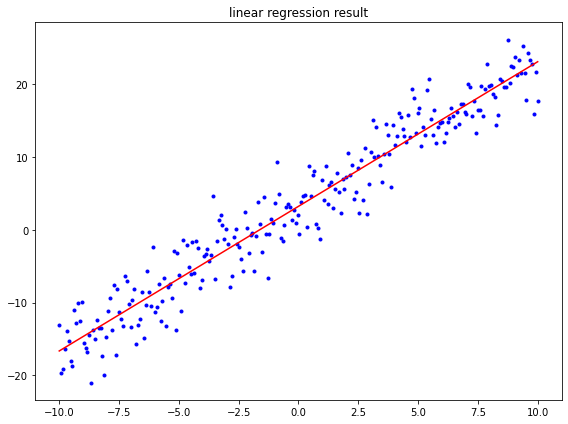

In [122]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

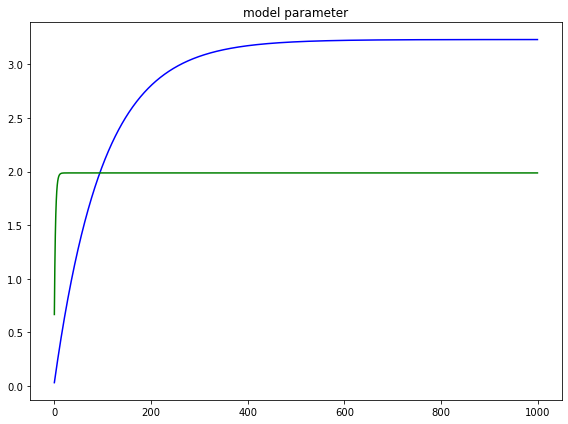

In [123]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

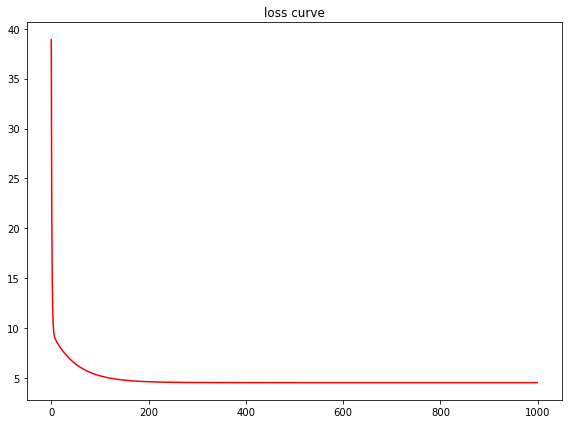

In [124]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

<ipython-input-120-8b23651060c8>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


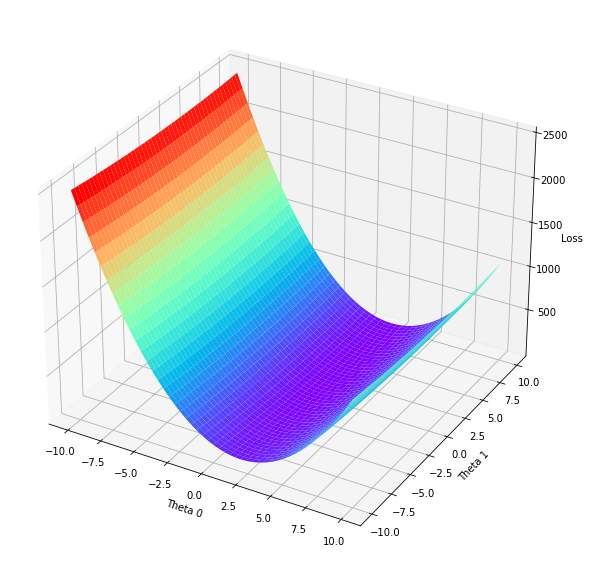

In [125]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)